In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors 2.0.zip'
path2 = r'E:\netData\APS\2 Laureates and Milestones\paired_laureates.xlsx'
f1 = pd.read_csv(path1)
f1['type'] = f1['type'].map(dict(zip(['获奖学者','非获奖学者'] , ['laureate' , 'non laureate'])))

# correlation

In [6]:
f1.head(3)

,au,pub_num,tc,h,g,DC,CC,dh,ch,TCD,TC,TD,CitCDP,type
0,p. bassi,4,57,3,4,18,39,2,2,0.092404,0.258095,0.165691,2.056634,non laureate
1,cl. gabriel,4,15,2,4,0,15,0,2,-0.027606,0.000000,0.027606,1.988942,non laureate
2,m. j. norgett,1,14,1,1,5,9,1,1,-0.007812,0.009766,0.017578,0.498656,non laureate


In [8]:
f11 = f1[f1['type']=='laureate']
f12 = f1[f1['type']=='non laureate']

In [13]:
ff = f11[[ 'pub_num','tc', 'h','g', 'DC', 'CC','dh', 'ch','TCD', 'TC','TD', 'CitCDP']]
ff.columns = ['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P']

In [15]:
ff.dropna(inplace=True)

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix1 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix1)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True
spearman_matrix1=pd.DataFrame(kendall_matrix1,index=col_name,columns=col_name)

In [16]:
ff = f12[[ 'pub_num','tc', 'h','g', 'DC', 'CC','dh', 'ch','TCD', 'TC','TD', 'CitCDP']]
ff.columns = ['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P']

In [18]:
ff.dropna(inplace=True)

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix2 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix2)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True
spearman_matrix2=pd.DataFrame(kendall_matrix2,index=col_name,columns=col_name)

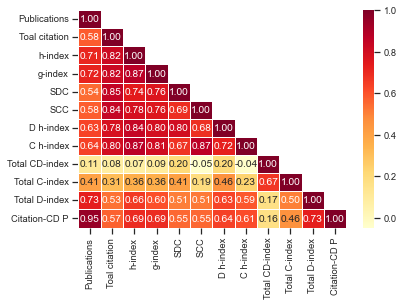

In [23]:
plt.rcParams['font.sans-serif'] = ['Arial']  # Use a Chinese font
sns.set(context='notebook', style='ticks', font_scale=0.85)
g = sns.heatmap(kendall_matrix,annot=True,mask=mask,xticklabels=col_name,yticklabels=col_name, fmt=".2f", linewidth=.5, cmap="YlOrRd")#绘制热力图
plt.savefig(r"G:\A J YANG PAPER\APS analysis\IPM SDC SCC\fig\fig 3\0.pdf",bbox_inches = 'tight')

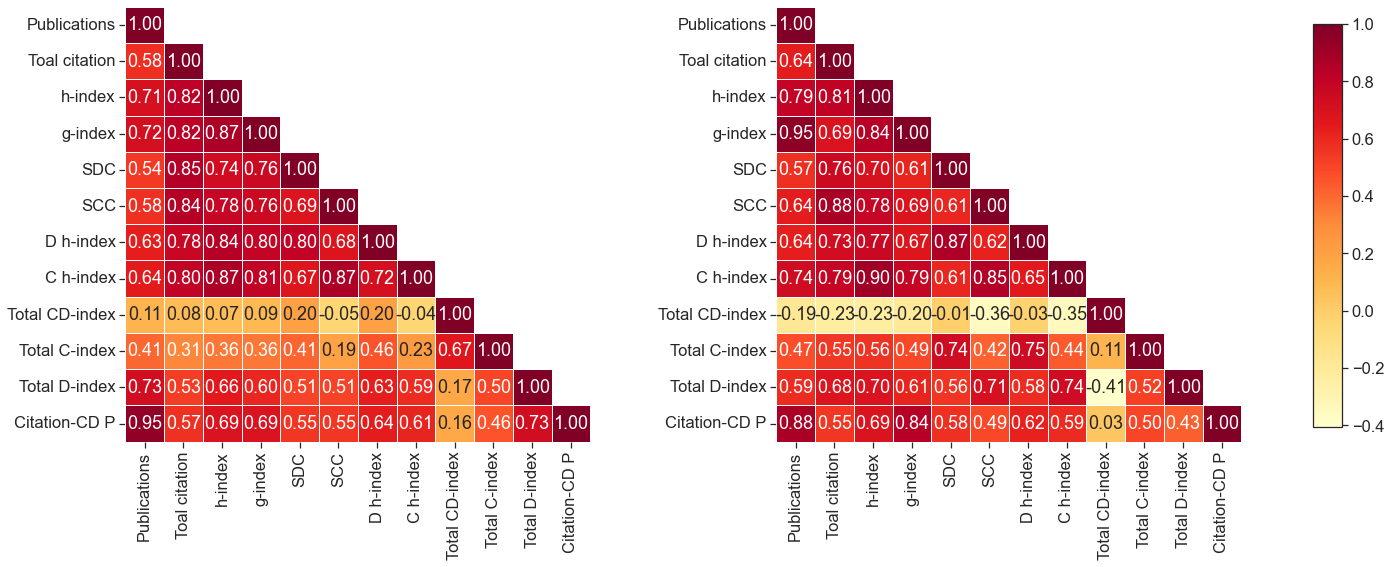

In [38]:
# assuming kendall_matrix1 and kendall_matrix2 are numpy arrays containing the correlation values
vmin = np.min([np.min(kendall_matrix1), np.min(kendall_matrix2)])
vmax = np.max([np.max(kendall_matrix1), np.max(kendall_matrix2)])

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.40,hspace=0)
sns.set(context='notebook', style='ticks', font_scale=1.5)

# plot heatmap 1 in the first subplot
sns.heatmap(kendall_matrix1, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[0], cbar=False)
#axs[0].set_title('Laureates')


# plot heatmap 2 in the second subplot without color bar
sns.heatmap(kendall_matrix2, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[1], cbar=False)
#axs[1].set_title('Non-laureates')

# add a shared color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].collections[0], cax=cbar_ax)

plt.savefig(r"G:\A J YANG PAPER\APS analysis\IPM SDC SCC\fig\fig 3\0.pdf",bbox_inches = 'tight')

In [10]:
lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation

kendall_matrix = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

In [11]:
kendall_matrix

,Publications,Toal citation,h-index,g-index,SDC,SCC,D h-index,C h-index,Total CD-index,Total C-index,Total D-index,Citation-CD P
Publications,1.000000,0.580057,0.708211,0.715890,0.543401,0.575652,0.633116,0.643609,0.110207,0.405690,0.728516,0.947730
Toal citation,0.580057,1.000000,0.817143,0.820622,0.847953,0.838198,0.780110,0.799233,0.078029,0.311162,0.531647,0.570065
h-index,0.708211,0.817143,1.000000,0.870087,0.737577,0.783284,0.838621,0.869896,0.072642,0.356409,0.656211,0.693383
g-index,0.715890,0.820622,0.870087,1.000000,0.760444,0.757690,0.795122,0.806904,0.091476,0.355073,0.603985,0.694499
SDC,0.543401,0.847953,0.737577,0.760444,1.000000,0.685326,0.797342,0.673983,0.202088,0.407038,0.507724,0.552818
SCC,0.575652,0.838198,0.783284,0.757690,0.685326,1.000000,0.681554,0.868566,-0.048085,0.193175,0.513185,0.550412
D h-index,0.633116,0.780110,0.838621,0.795122,0.797342,0.681554,1.000000,0.722352,0.201502,0.456429,0.633292,0.640855
C h-index,0.643609,0.799233,0.869896,0.806904,0.673983,0.868566,0.722352,1.000000,-0.042963,0.234047,0.587004,0.614023
Total CD-index,0.110207,0.078029,0.072642,0.091476,0.202088,-0.048085,0.201502,-0.042963,1.000000,0.666786,0.168515,0.164937
Total C-index,0.405690,0.311162,0.356409,0.355073,0.407038,0.193175,0.456429,0.234047,0.666786,1.000000,0.501729,0.459034
